## 1: Installing the Packages

In [ ]:
%%capture
!pip install super-gradients
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [ ]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

[2024-02-20 13:19:09] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2024-02-20 13:19:09] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-02-20 13:19:10] INFO - utils.py - NumExpr defaulting to 2 threads.
[2024-02-20 13:19:21] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-02-20 13:19:21] WARNING - export.py - Failed to import pytorch_quantization
[2024-02-20 13:19:21] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [ ]:
from IPython.display import clear_output

In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

In [ ]:
from super_gradients.training import models

## 2: Setting the checkpoint directory | Instantiated the trainer

In [ ]:
CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='pedestrian_dataset_yolonas_run', ckpt_root_dir=CHECKPOINT_DIR)

## 3: Exporting the Dataset

In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="UlOyqcHQujSghQaVVEyI")
# project = rf.workspace("neevd").project("neevd")
# dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to NEEVD-3 in yolov5pytorch::   0%|          | 0/3944 [00:00<?, ?it/s]

Extracting Dataset Version Zip to NEEVD-3 in yolov5pytorch:: 100%|██████████| 3944/3944 [00:00<00:00, 8699.58it/s]


In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1gQD1OovQDyjMlUEWl6IEn2mzgS6KNppX

Downloading...
From (original): https://drive.google.com/uc?id=1gQD1OovQDyjMlUEWl6IEn2mzgS6KNppX
From (redirected): https://drive.google.com/uc?id=1gQD1OovQDyjMlUEWl6IEn2mzgS6KNppX&confirm=t&uuid=285f4c89-69c6-4cbd-ab4c-1ab017ecfd81
To: /content/1144images_dataset.zip
100% 949M/949M [00:11<00:00, 84.9MB/s]


In [ ]:
!unzip 1144images_dataset.zip

Archive:  1144images_dataset.zip
   creating: 1144images_aryan/
   creating: 1144images_aryan/test_aryan/
  inflating: 1144images_aryan/test_aryan/00003.png  
  inflating: 1144images_aryan/test_aryan/00003.txt  
  inflating: 1144images_aryan/test_aryan/00006.png  
 extracting: 1144images_aryan/test_aryan/00006.txt  
  inflating: 1144images_aryan/test_aryan/00008.png  
  inflating: 1144images_aryan/test_aryan/00008.txt  
  inflating: 1144images_aryan/test_aryan/00011.png  
  inflating: 1144images_aryan/test_aryan/00011.txt  
  inflating: 1144images_aryan/test_aryan/00028.png  
  inflating: 1144images_aryan/test_aryan/00028.txt  
  inflating: 1144images_aryan/test_aryan/00035.png  
  inflating: 1144images_aryan/test_aryan/00035.txt  
  inflating: 1144images_aryan/test_aryan/00037.png  
  inflating: 1144images_aryan/test_aryan/00037.txt  
  inflating: 1144images_aryan/test_aryan/00038.png  
  inflating: 1144images_aryan/test_aryan/00038.txt  
  inflating: 1144images_aryan/test_aryan/00040

In [ ]:
import os
import shutil
import random

test_dir = '/content/1144images_aryan/test_aryan'
valid_dir = '/content/1144images_aryan/valid_aryan'

os.makedirs(valid_dir, exist_ok=True)

png_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

random.shuffle(png_files)

for f in png_files[:83]:
    shutil.move(os.path.join(test_dir, f), os.path.join(valid_dir, f))

    txt_file = f.replace('.png', '.txt')
    shutil.move(os.path.join(test_dir, txt_file), os.path.join(valid_dir, txt_file))

In [ ]:
import os
import shutil

train_dir = '/content/1144images_aryan/train_aryan'
labels_dir = '/content/1144images_aryan/train_aryan/labels'
images_dir = '/content/1144images_aryan/train_aryan/images'

os.makedirs(labels_dir, exist_ok=True)
os.makedirs(images_dir, exist_ok=True)

files = os.listdir(train_dir)

for f in files:
    if f.endswith('.png'):
        shutil.move(os.path.join(train_dir, f), os.path.join(images_dir, f))
    elif f.endswith('.txt'):
        shutil.move(os.path.join(train_dir, f), os.path.join(labels_dir, f))

In [ ]:
test_dir = '/content/1144images_aryan/test_aryan'
labels_dir = '/content/1144images_aryan/test_aryan/labels'
images_dir = '/content/1144images_aryan/test_aryan/images'

os.makedirs(labels_dir, exist_ok=True)
os.makedirs(images_dir, exist_ok=True)

files = os.listdir(test_dir)

for f in files:
    if f.endswith('.png'):
        shutil.move(os.path.join(test_dir, f), os.path.join(images_dir, f))
    elif f.endswith('.txt'):
        shutil.move(os.path.join(test_dir, f), os.path.join(labels_dir, f))

In [ ]:
valid_dir = '/content/1144images_aryan/valid_aryan'
labels_dir = '/content/1144images_aryan/valid_aryan/labels'
images_dir = '/content/1144images_aryan/valid_aryan/images'

os.makedirs(labels_dir, exist_ok=True)
os.makedirs(images_dir, exist_ok=True)

files = os.listdir(valid_dir)

for f in files:
    if f.endswith('.png'):
        shutil.move(os.path.join(valid_dir, f), os.path.join(images_dir, f))
    elif f.endswith('.txt'):
        shutil.move(os.path.join(valid_dir, f), os.path.join(labels_dir, f))

In [ ]:
%cd /content/1144images_aryan/valid_aryan/images
!find . -name "*.png" | wc -l


/content/1144images_aryan/valid_aryan/images
83


## 4: Load dataset parameters into a dictionary

In [ ]:
import yaml

with open('/content/1144images_aryan/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

classes = data.pop('names')

print(classes)

['200m', '50-100m', 'Ahead-Left', 'Ahead-Right', 'Axle-load-limit', 'Barrier Ahead', 'Bullock Cart Prohibited', 'Cart Prohobited', 'Cattle', 'Compulsory Ahead', 'Compulsory Keep Left', 'Compulsory Left Turn', 'Compulsory Right Turn', 'Cross Road', 'Cycle Crossing', 'Compulsory Cycle Track', 'Cycle Prohibited', 'Dangerous Dip', 'Falling Rocks', 'Ferry', 'Gap in median', 'Give way', 'Hand cart prohibited', 'Height limit', 'Horn prohibited', 'Humpy Road', 'Left hair pin bend', 'Left hand curve', 'Left Reverse Bend', 'Left turn prohibited', 'Length limit', 'Load limit 5T', 'Loose Gravel', 'Major road ahead', 'Men at work', 'Motor vehicles prohibited', 'Nrrow bridge', 'Narrow road ahead', 'Straight prohibited', 'No parking', 'No stoping', 'One way sign', 'Overtaking prohibited', 'Pedestrian crossing', 'Pedestrian prohibited', 'Restriction ends sign', 'Right hair pin bend', 'Right hand curve', 'Right Reverse Bend', 'Right turn prohibited', 'Road wideness ahead', 'Roundabout', 'School ahead',

In [ ]:
dataset_params = {
    'data_dir':'/content/1144images_aryan',
    'train_images_dir':'train_aryan/images',
    'train_labels_dir':'train_aryan/labels',
    'val_images_dir':'valid_aryan/images',
    'val_labels_dir':'valid_aryan/labels',
    'test_images_dir':'test_aryan/images',
    'test_labels_dir':'test_aryan/labels',
    'classes': classes
}

## 5: Pass the values for `dataset_params` into the `dataset_params` argument

In [ ]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

## 6: Inspect the dataset

In [ ]:
train_data.dataset.transforms

In [ ]:
train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [ ]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

## 7: Plot a batch of training data

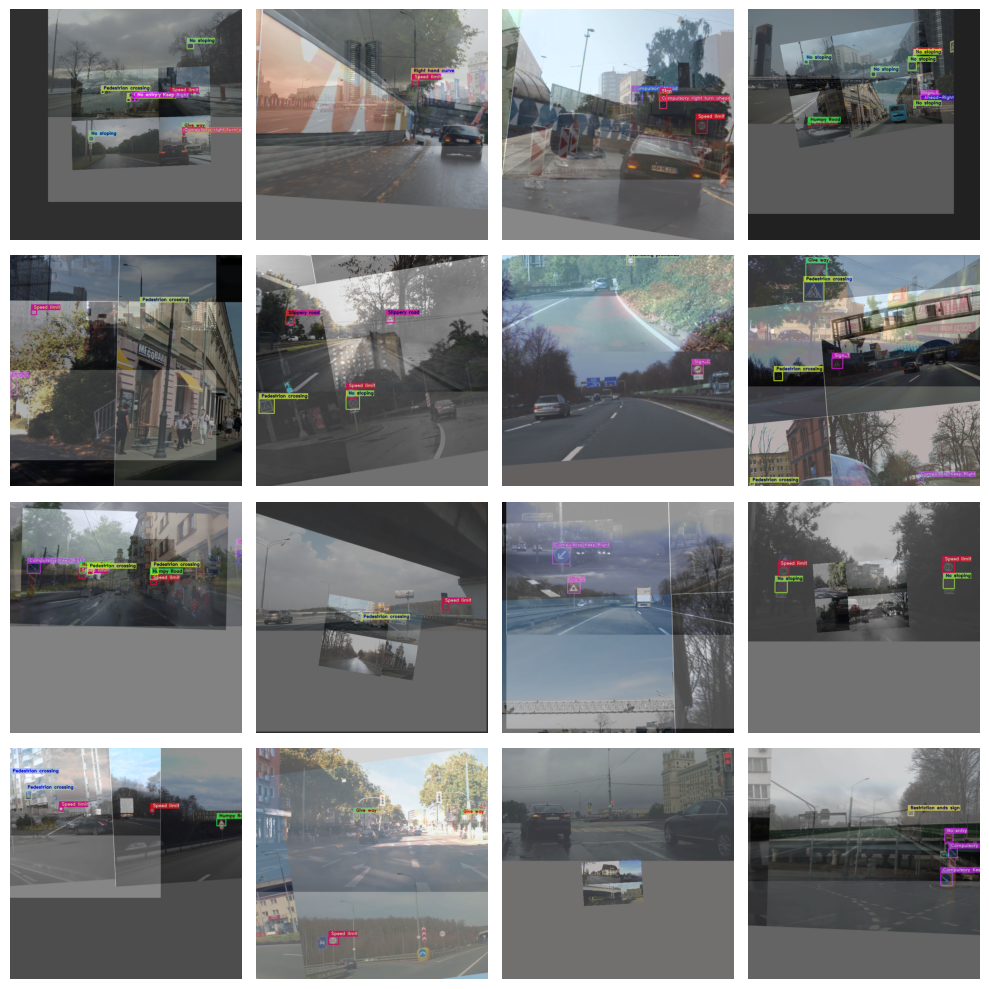

In [ ]:
train_data.dataset.plot()

## 8: Instantiating the model

In [ ]:
model = models.get('yolo_nas_s',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2024-02-20 13:49:22] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth
100%|██████████| 73.1M/73.1M [00:19<00:00, 4.03MB/s]
[2024-02-20 13:49:42] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [ ]:
print(model)

YoloNAS_S(
  (backbone): NStageBackbone(
    (stem): YoloNASStem(
      (conv): QARepVGGBlock(
        (nonlinearity): ReLU(inplace=True)
        (se): Identity()
        (branch_3x3): Sequential(
          (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        )
        (branch_1x1): Conv2d(3, 48, kernel_size=(1, 1), stride=(2, 2))
        (post_bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (rbr_reparam): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      )
    )
    (stage1): YoloNASStage(
      (downsample): QARepVGGBlock(
        (nonlinearity): ReLU(inplace=True)
        (se): Identity()
        (branch_3x3): Sequential(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=Tr

## 9: Define metrics and training parameters

### There are a few **mandatory** arguments that must defined for training params

- `max_epochs` - Max number of training epochs

- `loss` - the loss function you want to use

- `optimizer` - Optimizer you will be using

- `train_metrics_list` - Metrics to log during training

- `valid_metrics_list` - Metrics to log during training

- `metric_to_watch` - metric which the model checkpoint will be saved according to

Can choose from a variety of `optimizer`'s such as: Adam, AdamW, SGD, Lion, or RMSProps.

In [ ]:
train_params = {
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": 20,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

## 10: Training the model

In [ ]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

[2024-02-20 13:50:27] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240220_135027_805213`
[2024-02-20 13:50:27] INFO - sg_trainer.py - Checkpoints directory: checkpoints/pedestrian_dataset_yolonas_run/RUN_20240220_135027_805213
[2024-02-20 13:50:27] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})


The console stream is now moved to checkpoints/pedestrian_dataset_yolonas_run/RUN_20240220_135027_805213/console_Feb20_13_50_27.txt


[2024-02-20 13:50:32] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            662        (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         82         (len(train_loader))
    - Gradient updates per epoch:   82         (len(train_loader) / batch_accumulate)
    - Model: YoloNAS_S  (19.05M parameters, 19.05M optimized)
    - Learning Rates and Weight Decays:
      - default: (19.05M parameters). LR: 0.0005 (19.05M parameters) WD: 0.0, (42.35K parameters), WD: 0.0001, (19.01M parameters)

[2024-02-20 13:52:21] INFO - base_sg_logger.py - Checkpoint saved i

## 11: Get the best trained model

In [ ]:
best_model = models.get('yolo_nas_s',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="checkpoints/pedestrian_dataset_yolonas_run/RUN_20240220_135027_805213/ckpt_best.pth")

## 12: Evaluating the best trained model on the test set

In [ ]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

Testing: 100%|██████████| 6/6 [00:04<00:00,  2.09it/s]

{'PPYoloELoss/loss_cls': 0.798676,
 'PPYoloELoss/loss_iou': 0.37807202,
 'PPYoloELoss/loss_dfl': 0.30990878,
 'PPYoloELoss/loss': 1.4866567,
 'Precision@0.50': 0.04754745960235596,
 'Recall@0.50': 0.8645157217979431,
 'mAP@0.50': 0.7124121785163879,
 'F1@0.50': 0.08887657523155212,
 'Best_score_threshold': 0.4099999964237213}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!cp -r "checkpoints/pedestrian_dataset_yolonas_run" "/content/drive/MyDrive/visionllm"